---
<br>
<br>

# <center> <big>Pandas & Seaborn Quiz</big> </center>


<br>
<div style="text-align: right"> 201400845 </div>
<div style="text-align: right"> 김 치 윤 </div>

[문제 1. 데이터 확인](#chapter-1) <br><br>
[문제 2. 데이터 다루기](#chapter-2) <br><br>
[문제 3. 데이터 시각화](#chapter-3)

<br>
<br>

---

<br>

### 다음 Packages를 load하여 진행하시오.(dfply 사용 x)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

<br>
<br>

![](https://github.com/Godkimchiy/Python-Excercise/blob/master/image/olympic2.png?raw=true)

<br>
<br>

## Olympic Data

### Description
* Name : 선수이름
* Sex : 성별
* Age : 나이
* Height : 신장
* Weight : 몸무게
* Team : 국가
* NOC : 세 자리 국가 코드
* Year : 출전연도
* Medal : 획득메달

### Data Load

In [3]:
Olympic = pd.read_csv("../data/Olympic.csv")
Olympic.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,A Lamusi,M,23,170,60.0,China,CHN,2012,None
1,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Bronze
2,Andreea Aanei,F,22,170,125.0,Romania,ROU,2016,None
3,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76.0,France,FRA,2012,None
4,Nstor Abad Sanjun,M,23,167,64.0,Spain,ESP,2016,None


<br>
<br>

# 문제 1. 데이터 확인<a id="chapter-1"></a>

### 1.1 데이터 행과 열 개수 확인하시오.

In [5]:
Olympic.shape

(35018, 9)

<br>

### 1.2 중복제거 후 행과 열 개수 확인하시오.
* 중복 기준은 특정 컬럼이 아닌 전체 컬럼에 대한 값이 같으면 중복 행으로 생각

In [10]:
Olympic = Olympic[~Olympic.duplicated()]
Olympic.shape

(27721, 9)

<br>

### 1.3 데이터 인덱스(index) 확인하시오.
* 인덱스 확인전에 .reset_index(drop=True) 실행 후 진행 할 것

In [15]:
Olympic = Olympic.reset_index(drop = True)
Olympic

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,A Lamusi,M,23,170,60.0,China,CHN,2012,None
1,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Bronze
2,Andreea Aanei,F,22,170,125.0,Romania,ROU,2016,None
3,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76.0,France,FRA,2012,None
4,Nstor Abad Sanjun,M,23,167,64.0,Spain,ESP,2016,None
...,...,...,...,...,...,...,...,...,...
27716,Viktoriya Viktorovna Zyabkina,F,23,174,62.0,Kazakhstan,KAZ,2016,None
27717,Dominik ycki,M,38,192,95.0,Poland,POL,2012,None
27718,ukasz Tomasz ygado,M,32,200,89.0,Poland,POL,2012,None
27719,Olga Igorevna Zyuzkova,F,33,171,69.0,Belarus,BLR,2016,None


<br>

### 1.4 데이터 컬럼(column) 확인하시오.

In [18]:
Olympic.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Medal'],
      dtype='object')

<br>

### 1.5 데이터 변수 형식 확인하시오.

In [20]:
Olympic.dtypes

Name       object
Sex        object
Age         int64
Height      int64
Weight    float64
Team       object
NOC        object
Year        int64
Medal      object
dtype: object

<br>

### 1.6 데이터 타입과 각 변수별 아이템 개수 확인하시오.

In [22]:
Olympic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27721 entries, 0 to 27720
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    27721 non-null  object 
 1   Sex     27721 non-null  object 
 2   Age     27721 non-null  int64  
 3   Height  27721 non-null  int64  
 4   Weight  27721 non-null  float64
 5   Team    27721 non-null  object 
 6   NOC     27721 non-null  object 
 7   Year    27721 non-null  int64  
 8   Medal   27721 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.9+ MB


<br>
<br>

# 문제 2. 데이터 다루기<a id="chapter-2"></a>

<br>

In [24]:
Olympic.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,A Lamusi,M,23,170,60.0,China,CHN,2012,None
1,Juhamatti Tapio Aaltonen,M,28,184,85.0,Finland,FIN,2014,Bronze
2,Andreea Aanei,F,22,170,125.0,Romania,ROU,2016,None
3,Jamale (Djamel-) Aarrass (Ahrass-),M,30,187,76.0,France,FRA,2012,None
4,Nstor Abad Sanjun,M,23,167,64.0,Spain,ESP,2016,None


<br>

### 2.1 Year별 Data수를 확인하시오.

In [67]:
Olympic['Year'].value_counts()

2016    11409
2012    10658
2014     2902
2010     2752
Name: Year, dtype: int64

<br>

### 2.2 NOC가 `KOR`인 선수들 별 출전 횟수를 출력하시오.

In [71]:
Olympic[Olympic['NOC']=='KOR']['Name'].value_counts().head(10)

Lee Seung-Hun     5
Park Seung-Hui    4
Kim Jong-Hyeon    4
Mo Tae-Beom       4
Shim Seok-Hui     4
Lee Sang-Hwa      4
Jo Hae-Ri         3
Lee Yong-Dae      3
Jin Jong-O        3
Kim Jang-Mi       3
Name: Name, dtype: int64

<br>

### 2.3 Year가 `2012`이고 NOC가 `KOR`이며 Medal은 `Gold`인 선수들의 이름,나이,성별,키,몸무게,메달 을 출력하시오.
* 임의의 object에 저장하여 head()를 이용해 출력할 것

In [82]:
kor_gold_12 = Olympic[(Olympic['Year']==2012) & (Olympic['NOC']=='KOR') & (Olympic['Medal']=='Gold')][['Name', 'Age', 'Sex', "Height", 'Weight', 'Medal']].reset_index(drop=True)
kor_gold_12.head()

,Name,Age,Sex,Height,Weight,Medal
0,Choi Hyeon-Ju,27,F,172,65.0,Gold
1,Gu Bon-Gil,23,M,182,70.0,Gold
2,Hwang Gyeong-Seon,26,F,175,67.0,Gold
3,Jin Jong-O,32,M,175,78.0,Gold
4,Ki Bo-Bae,24,F,167,57.0,Gold


<br>

* 위 데이터를 이용하여 DataFrame의 간단한 통계 정보를 출력할 것

In [83]:
kor_gold_12.describe()

,Age,Height,Weight
count,16.000000,16.000000,16.000000
mean,26.312500,173.312500,70.312500
std,4.126641,7.997656,12.757841
min,19.000000,159.000000,53.000000
25%,23.750000,166.500000,63.000000
50%,27.000000,175.000000,68.500000
75%,29.250000,180.250000,78.000000
max,33.000000,182.000000,100.000000


<br>

### 2.4 Medal이 `Gold, Silver`이며 NOC가 `KOR,USA,CHN`인 데이터만 `head()`로 출력하시오.

In [86]:
Olympic[(Olympic.Medal.isin(['Gold', 'Silver'])) & (Olympic.NOC.isin(['KOR', 'USA', 'CHN']))].reset_index(drop=True).head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,Nathan Ghar-Jun Adrian,M,23,198,100.0,United States,USA,2012,Gold
1,Nathan Ghar-Jun Adrian,M,23,198,100.0,United States,USA,2012,Silver
2,Nathan Ghar-Jun Adrian,M,27,198,100.0,United States,USA,2016,Gold
3,Morolake Akinosun,F,22,163,61.0,United States,USA,2016,Gold
4,Foluke Antinuke Akinradewo,F,24,191,79.0,United States,USA,2012,Silver


<br>
<br>

# 문제 3. 데이터 시각화<a id="chapter-3"></a>
* 문제3 은 Olympic_viz.csv 데이터를 이용하여 진행할 것
<br>

### Data Load

In [3]:
Olympic_viz = pd.read_csv('../data/Olympic_viz.csv')
Olympic_viz.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Medal
0,Luc Abalo,M,27,182,86.0,France,FRA,2012,Gold
1,Luc Abalo,M,31,182,86.0,France,FRA,2016,Silver
2,Jeremy Abbott,M,28,175,70.0,United States,USA,2014,Bronze
3,Jennifer Abel,F,20,160,62.0,Canada,CAN,2012,Bronze
4,Denis Mikhaylovich Ablyazin,M,19,161,62.0,Russia,RUS,2012,Bronze


<br>

### 3.1 Seaborn countplot을 이용하여 NOC별 메달 수를 그리시오.

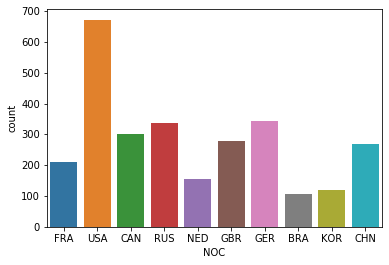

In [6]:
sns.countplot(Olympic_viz['NOC'])

<br>

### 3.2 Seaborn countplot을 이용하여 NOC별 메달 수를 높은순으로 다음과 같이 그리시오.

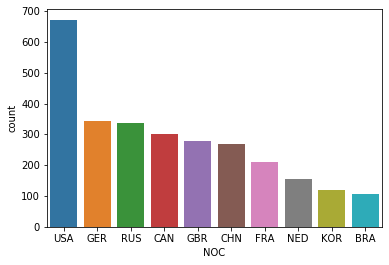

In [9]:
sns.countplot(Olympic_viz['NOC'], order = Olympic_viz['NOC'].value_counts().index)

<br>

### 3.3 Seaborn countplot을 이용하여 NOC별 메달 수를 높은순으로 다음과 같이 그리시오.

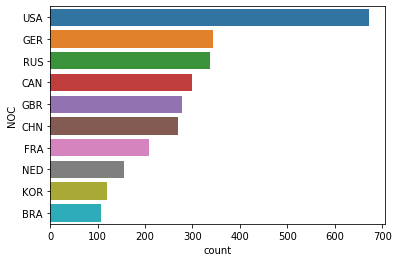

In [14]:
sns.countplot(data=Olympic_viz, y='NOC',order = Olympic_viz['NOC'].value_counts().index)

<br>

### 3.4 Seaborn countplot을 이용하여 NOC별 메달 수를 낮은순으로 다음과 같이 그리시오.

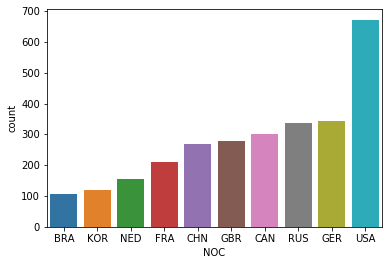

In [20]:
sns.countplot(Olympic_viz['NOC'], order = Olympic_viz['NOC'].value_counts().sort_values(ascending = True).index)

<br>

### 3.5 NOC별 메달 수를 비율로 다음과 같이 출력 후 시각화 하시오.
* hint : `value_counts()`, `unstack()`
* plot : Seaborn 패키지 사용안해도 됨

In [161]:
df = Olympic_viz.groupby('NOC')['Medal'].value_counts(normalize = True).unstack()
df

Medal,Bronze,Gold,Silver
NOC,,,
BRA,0.157407,0.462963,0.379630
CAN,0.356667,0.436667,0.206667
CHN,0.289963,0.423792,0.286245
FRA,0.277512,0.267943,0.454545
GBR,0.277978,0.400722,0.321300
GER,0.329446,0.361516,0.309038
KOR,0.369748,0.369748,0.260504
NED,0.301282,0.301282,0.397436
RUS,0.329377,0.400593,0.270030


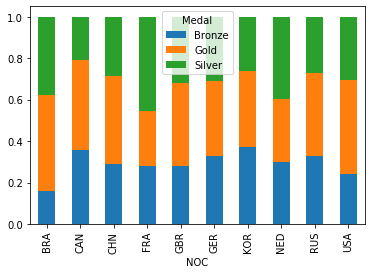

In [168]:
df.plot(kind = 'bar', stacked = True)